Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


Load dataset

In [2]:

tt = pd.read_csv('train.csv')

Preview data

In [3]:
print(tt.shape)

(891, 12)


Show all columns

In [4]:
print(tt.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Show 1st 5 data from dataset

In [5]:
tt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Show last 5 data from dataset

In [6]:
tt.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Info of data

In [7]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Summary of data 

In [8]:
tt.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Checking out the missing values in the dataset

In [9]:
tt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Droping out the duplicates values in the dataset

In [10]:
tt.drop_duplicates(keep='first', inplace=True)

Drop the columns -- unlikely to influence survival/ are not useful for modeling

In [11]:
tt.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [12]:
tt.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

Fill the dataset

In [13]:
tt['Age'].fillna(tt['Age'].median(), inplace=True)
tt['Embarked'].fillna(tt['Embarked'].mode()[0], inplace=True)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_32712\1939551101.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tt['Age'].fillna(tt['Age'].median(), inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_32712\1939551101.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

Checking out for null values

In [14]:
tt.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Convert categorical variables to numerical format

In [16]:
label_encoder = LabelEncoder()
tt['Sex'] = label_encoder.fit_transform(tt['Sex'])         # male:1, female:0
tt['Embarked'] = label_encoder.fit_transform(tt['Embarked'])  # C, Q, S to 0, 1, 2

Seperate features and target variable

In [17]:
X = tt.drop('Survived', axis=1)  # Independent variables
y = tt['Survived']               # Target variable


Split dataset into training and testing sets (80% train n 20 % test)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Initialize and train the Random Forest Classifier

In [19]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Make predictions on the test set

In [20]:
y_pred = model.predict(X_test)

Display the models performance

In [21]:
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nDetailed Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.8212290502793296

Detailed Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



Analyze which features had the most impact on predictions

In [22]:
feature_importance = model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importance)[::-1]

 Plot feature importances

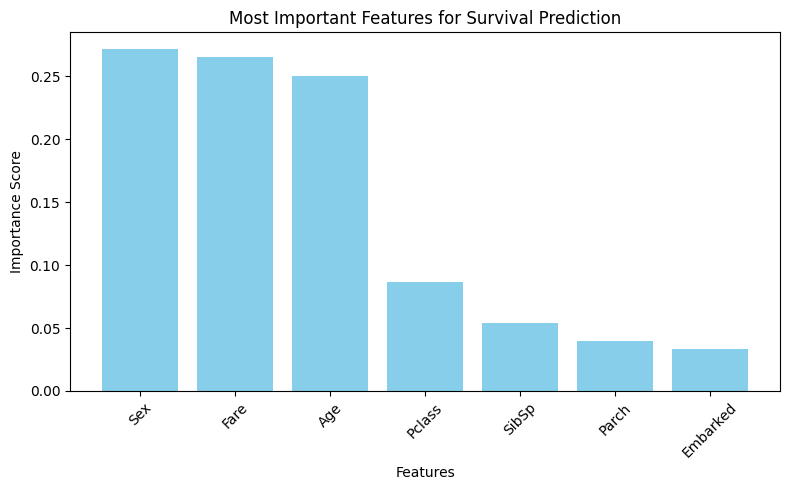

In [23]:
plt.figure(figsize=(8, 5))
plt.title("Most Important Features for Survival Prediction")
plt.bar(range(X.shape[1]), feature_importance[sorted_indices], align="center", color='skyblue')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in sorted_indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

Save model using joblib

In [24]:
import joblib

In [27]:
joblib.dump(model, 'titanic_model.pkl')
# joblib.dump(label_encoder, 'label_encoder.pkl')

print("Model saved!")

Model saved!


In [28]:
model = joblib.load('titanic_model.pkl')